In [1]:
import zipfile
import os


In [2]:
zip_file_path = 'Dataset Brain Tumor.zip'  # Replace with your file's name
extract_dir = 'Dataset Brain Tumor'  # Replace with the desired extraction directory


In [3]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [4]:
extracted_files = os.listdir(extract_dir)
print(extracted_files)

['Dataset Brain Tumor']


In [1]:
# Set paths
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = 'Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset'
test_dir = 'Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset'

# Define image size and batch size
image_size = (240, 240)
batch_size = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Testing data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


2024-08-31 22:05:39.315014: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-31 22:05:39.338642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-31 22:05:39.366845: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-31 22:05:39.375202: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-31 22:05:39.396986: I tensorflow/core/platform/cpu_feature_guar

Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.


In [2]:
from tensorflow.keras import layers, models

def create_cnn_model_with_sigmoid_fc(input_shape):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer with Sigmoid Activation
    model.add(layers.Dense(128, activation='sigmoid'))

    # Output Layer with Softmax Activation
    model.add(layers.Dense(4, activation='softmax'))

    return model

# Input shape
input_shape = (240, 240, 3)  # Assuming RGB images

# Create the model
model_sigmoid_fc = create_cnn_model_with_sigmoid_fc(input_shape)

# Compile the model
model_sigmoid_fc.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Model summary
model_sigmoid_fc.summary()

history = model_sigmoid_fc.fit(
    train_generator,
    epochs=50,  # Adjust based on your needs
    validation_data=test_generator
)

/nfsshare/achuthan/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-31 22:06:19.247399: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38105 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:51:00.0, compute capability: 8.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 236, 236, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 118, 118, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 114, 114, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 57, 57, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 53, 53, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,334,852 (43.24 MB)

 Trainable params: 11,334,852 (43.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/nfsshare/achuthan/.local/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725122188.483927     427 service.cc:146] XLA service 0x7fe5e401b1c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725122188.484033     427 service.cc:154]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
2024-08-31 22:06:28.569481: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-31 22:06:31.087687: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  1/179 ━━━━━━━━━━━━━━━━━━━━ 44:37 15s/step - accuracy: 0.2812 - loss: 1.3977

I0000 00:00:1725122197.729861     427 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 85s 392ms/step - accuracy: 0.4622 - loss: 1.1754 - val_accuracy: 0.6826 - val_loss: 0.8114
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 74s 397ms/step - accuracy: 0.6838 - loss: 0.7801 - val_accuracy: 0.6858 - val_loss: 0.7955
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 73s 390ms/step - accuracy: 0.7228 - loss: 0.6972 - val_accuracy: 0.7628 - val_loss: 0.6026
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 343ms/step - accuracy: 0.7499 - loss: 0.6197 - val_accuracy: 0.7211 - val_loss: 0.7256
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 71s 379ms/step - accuracy: 0.7611 - loss: 0.5833 - val_accuracy: 0.7573 - val_loss: 0.6239
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 432ms/step - accuracy: 0.7808 - loss: 0.5466 - val_accuracy: 0.7659 - val_loss: 0.6175
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 410ms/step - accuracy: 0.8134 - loss: 0.4933 - val_accuracy: 0.7062 - val_loss: 0.7591
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 342ms/step - accuracy: 0.8057 - loss: 0.4862 - val

179/179 ━━━━━━━━━━━━━━━━━━━━ 121s 644ms/step - accuracy: 0.9384 - loss: 0.1675 - val_accuracy: 0.9379 - val_loss: 0.1733


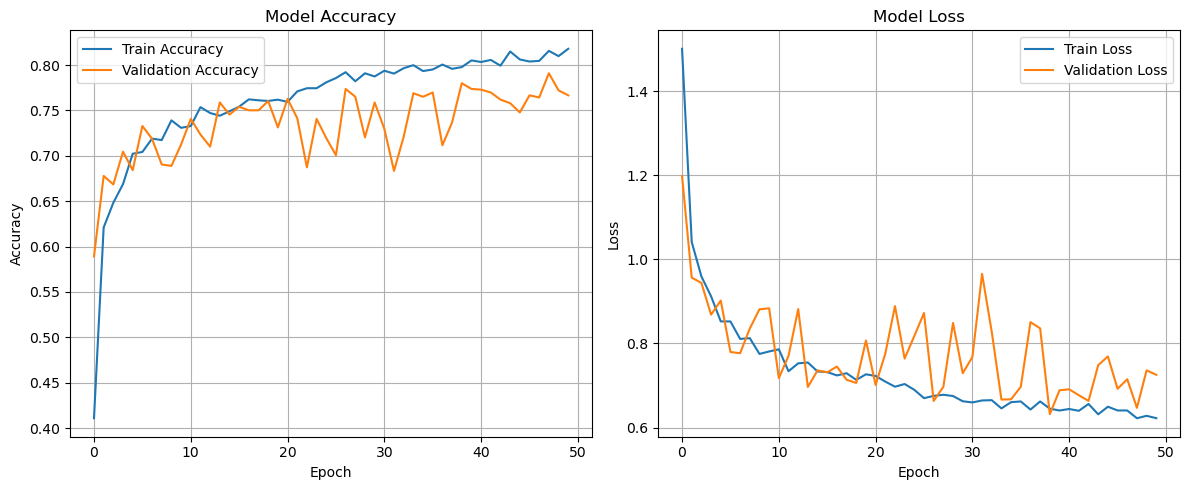

In [7]:
import matplotlib.pyplot as plt

# Assuming you have saved the history of your training process in a variable named 'history'
# Example:
# history = model.fit(...)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
